<a href="https://colab.research.google.com/github/cedro3/ECON/blob/master/ECON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

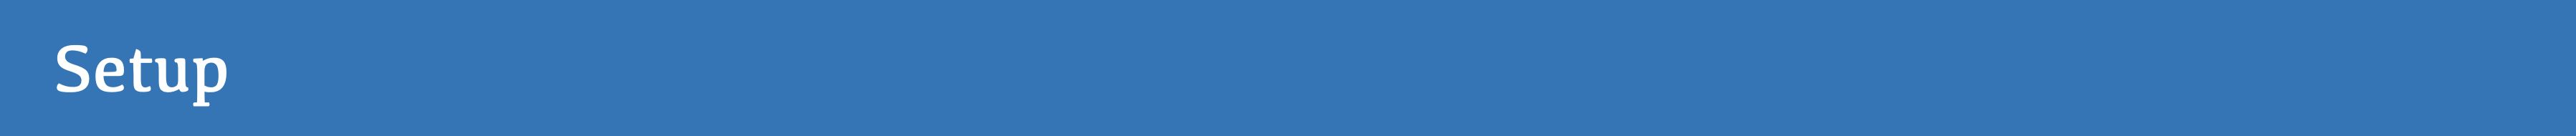

In [ ]:
# Installs mamba and updates base
%%shell
curl -L -O https://github.com/conda-forge/miniforge/releases/latest/download/Mambaforge-Linux-x86_64.sh
chmod +x Mambaforge-Linux-x86_64.sh
bash Mambaforge-Linux-x86_64.sh -b -f -p /usr/local
mamba config --env --set always_yes true
rm Mambaforge-Linux-x86_64.sh
mamba update -n base -c defaults conda -y

In [ ]:
# Clones repository
!git clone https://github.com/cedro3/ECON.git
%cd ECON

In [ ]:
# apt-get for requirements
from IPython.display import clear_output
!sudo apt-get install libeigen3-dev ffmpeg > /dev/null
clear_output()

In [ ]:
# Creates mamba environment and activates it from environment.yaml. Takes ~10 minutes.
# Note: it's okay to ignore the "Namespace no_user" error
%%shell
mamba env create -f environment.yaml > /dev/null
mamba init bash
source /root/.bashrc
source activate econ

In [ ]:
# Installs pip installable packages. ~ 3 minutes
%%shell
source activate econ
pip install -r requirements.txt
pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py38_cu116_pyt1130/download.html

In [ ]:
# Install libmesh & libvoxelize
%%shell
source activate econ
cd lib/common/libmesh
python setup.py build_ext --inplace > /dev/null
cd ../libvoxelize
python setup.py build_ext --inplace > /dev/null

### Downloading Models

(1) Go to this [link](https://icon.is.tue.mpg.de/login.php).<br>
(2) Login -> Register -> Verify Account -> Login.<br>
(3) Click your email (at the top of the website when logged in) --> Register for other projects.

Register for:<br>

SMPL: SMPL Model (Male, Female)<br>
SMPL-X: SMPL-X Model, used for training<br>
SMPLIFY: SMPL Model (Neutral)<br>
PIXIE: PIXIE SMPL-X estimator<bre>

In [ ]:
#Downloading required models and extra data. 
#Provide ICON username and password when prompted below

%%shell
bash fetch_data.sh 

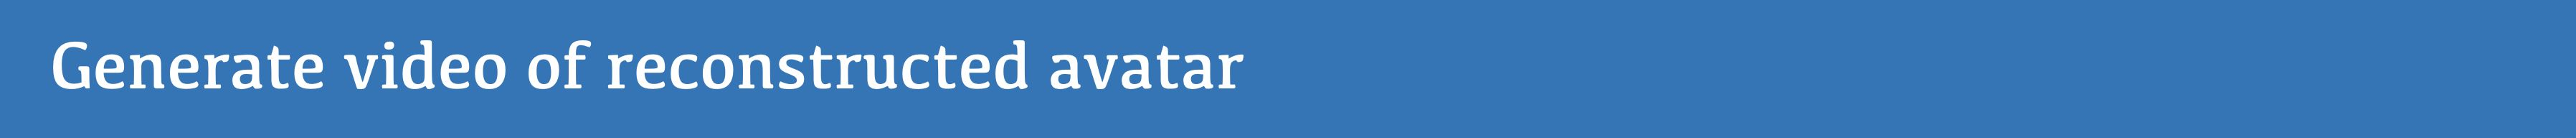


In [ ]:
#@title Set file
from IPython.display import Image, display
import os
import shutil

file_name = '033.jpg' #@param {type:"string"}
file_path = 'examples/'+file_name
filename = os.path.splitext(file_name)[0]

if os.path.isdir('input_file'):
  shutil.rmtree('input_file')
os.makedirs('input_file',exist_ok=True)

shutil.copy(file_path, 'input_file/'+file_name)
display(Image(file_path))
print('filename = ', filename)

In [ ]:
#@title Infer avator
%%shell
source activate econ

# For single-person image-based reconstruction
python -m apps.infer -cfg ./configs/econ.yaml -in_dir ./input_file -out_dir ./results

# For multi-person image-based reconstruction (see config/econ.yaml)
#python -m apps.infer -cfg ./configs/econ.yaml -in_dir ./input_file -out_dir ./results -multi

# To animate the reconstruction with SMPL-X pose parameters
#python -m apps.avatarizer -n {file.name} # e.g. 304e9c4798a8c3967de7c74c24ef2e38 to animate the example 

In [ ]:
#@title Generate video
#After 'python -m apps.multi_render -n' , fill in the filenmae mentioned above

%%shell
source activate econ

# To generate the demo video of reconstruction results
python -m apps.multi_render -n 033 # e.g. 021 to generate video (mp4) of the example

In [ ]:
#@title Play video
video_path = f"/content/ECON/results/econ/vid/{filename}_cloth.mp4"

# Compressed video path
import os
compressed_path = f"/content/ECON/results/econ/vid/{filename}_cloth_compress.mp4"
os.system(f"ffmpeg -i {video_path} -vcodec libx264 {compressed_path}")

from IPython.display import HTML
from base64 import b64encode
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video height=512 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
#@title Download video
from google.colab import files
files.download(compressed_path)